# 3주차 정리

## 1. CSV 파일 데이터 읽기

In [ ]:
import csv

f = open('incheon_weather.csv', 'r')
data = csv.reader(f)
'''
csv.reader(): csv 파일 데이터 읽기
csv.writer(): csv 데이터를 파일에 저장
'''

for row in data:
    print(row)
    
f.close()

헤더 처리하기: 헤더를 별도로 처리하기 위해 `next()` 함수를 사용함

In [ ]:
import csv

f = open('incheon_weather.csv')
data = csv.reader(f)

header = next(data)

for row in data:
    print(row)

### 모듈? 패키지? 라이브러리?

- 모듈: 특정 기능(함수, 변수, 클래스 등)들이 구현되어있는 **파일**(.py)


- 패키지: 특정 기능과 관련된 여러 모듈들을 하나의 **폴더**에 넣어놓은 것


- 라이브러리: 여러 모듈과 패키지를 묶어서 부르는 말
    - 표준라이브러리
        - 파이썬을 설치할 때 기본적으로 설치되는 라이브러리
        - 예: time, sys, os, math ...
    - 외부 라이브러리(Third Party Library)


## 2. 기온 데이터 분석하기

### 기온 공공데이터에 질문하기

>질문: 가장 더웠던 날은 언제였을까?

1. 질문 다듬기
    - 기상 관측 이래, 인천의 최고 기온이 가장 높았던 날은 언제였고, 몇 도 였을까?
    
    
2. 문제 해결 방법 구상하기
    - 질문을 해결하는데 필요한 데이터는? 날짜, 최고기온 데이터
    

3. 파이썬 코드로 구현하기

In [13]:
import csv

f = open('incheon_weather.csv')
data = csv.reader(f)

header = next(data)

max_t = -999
max_t_d = ''


for row in data:
    # row[0]: 날짜
    # row[4]: 최고 기온
    if row[4] == '':
        continue
        
    t = float(row[4])
    if t > max_t:
        max_t = t
        max_t_d = row[0]

f.close()

print(max_t)
print(max_t_d)

38.9
1949-07-16


## 3. 데이터 시각화

### 1. maptplotlib 패키지

- 파이썬으로 데이터를 시각화할 때 가장 많이 사용

```python
import matplotlib.pyplot as plt
```

### 2. 기본 그래프 그리기

```python
plt.plot(list1)
plt.plot(list1, list2)
```

### 3. 그래프에 옵션 추가

- 그래프에 제목 넣기
- 그래프에 범례 넣기
- 그래프에 색상 바꾸기
- 그래프에 선 모양 바꾸기
- 마커 모양 바꾸기

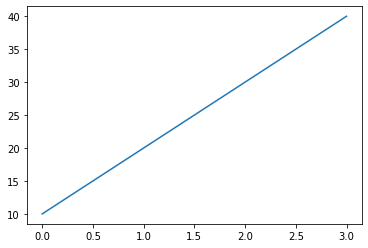

In [14]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40]) # ([0, 1, 2, 3], y_list)
# x축은 자동으로 0, 1씩 증가

plt.show()

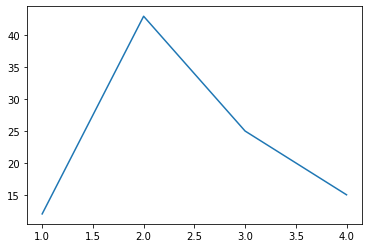

In [15]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [12, 43, 25, 15]) # (x_list, y_list)
plt.show()

### 그래프 옵션
1. 그래프에 제목 넣기

- plt.title("제목으로 사용할 문자열")

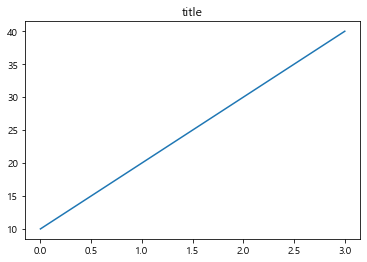

In [31]:
import matplotlib.pyplot as plt

'''
[폰트]
plt.rc('font', family = 'Malgun Gothic')
'''

plt.plot([10, 20, 30, 40])
plt.title("title")
plt.show()

2. 그래프에 범례 넣기

- 범례(legend)? 그래프가 의미하는 `바(Bar)`를 구별하기 위해 사용


- `plot()` 함수에 `label`이라는 속성의 레이블 값으로 원하는 문자열 입력


- 그래프 그리기 전에 `legend()` 함수 실행

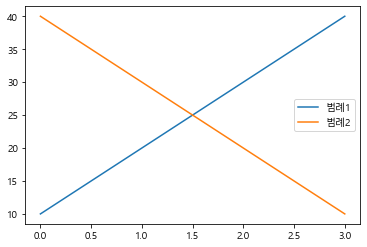

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.plot([10, 20, 30, 40], label='범례1')
plt.plot([40, 30, 20, 10], label='범례2')

plt.legend() # plt.legend(loc=5): 범례 위치 조정
plt.show()

3. 그래프 색상 바꾸기
- `plot()` 함수에 color라는 속성에 원하는 색상 입력

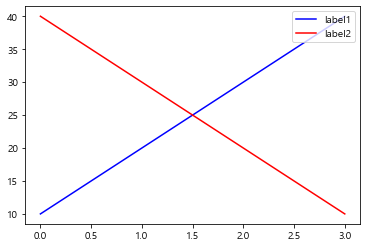

In [25]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40], label='label1', color='b')
plt.plot([40, 30, 20, 10], label='label2', color='r')

plt.legend(loc=1)
plt.show()

4. 그래프 선 모양 바꾸기

- `plot()` 함수에 `linestyle` 속성(ls라고 작성할 수도 있음)

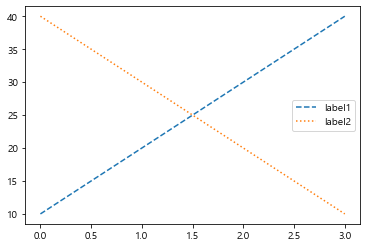

In [28]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40], ls='--', label='label1')
plt.plot([40, 30, 20, 10], ls=':', label='label2')

plt.legend()
plt.show()

5. 마커 모양 바꾸기

- `plot()` 함수에 `marker`라는 속성에 원하는 마커 모양 지정

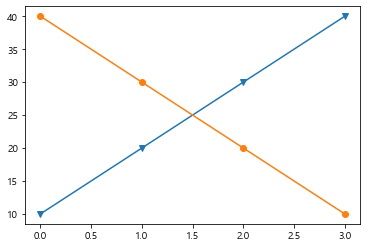

In [30]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40], marker='v')
plt.plot([40, 30, 20, 10], marker='o')

plt.show()

# 3. 기온 변화 그래프 그리기

1. 리스트에 데이터 저장
2. 데이터 시각화하기
3. 날짜 데이터 추출

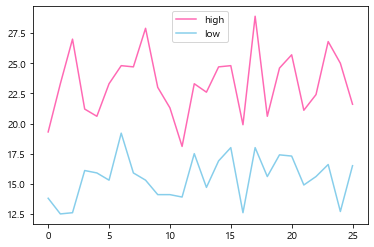

In [46]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_weather.csv')
data = csv.reader(f)
next(data)
high = []
low = []

# 5월 30일만 보기

for row in data:
    if row[-1] == '':
        continue
        
    date = row[0].split('-')
    
    if int(date[0]) >= 1997 \
        and date[1] == '05' \
        and date[2] == '30':
        
        high.append(float(row[-1]))
        low.append(float(row[-2]))
        
f.close()

# plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호
plt.plot(high, color='hotpink', label='high')
plt.plot(low, color='skyblue', label='low')

plt.legend()
plt.show()